In [1]:
import time
import csv
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import sys


train_df = pd.read_csv('train.tsv', delimiter='\t')
test_df = pd.read_csv('test.tsv', delimiter='\t')

# corr_matrix = train_data.corr()
# print(corr_matrix['revenue'].sort_values(ascending=False))

train_df1=pd.get_dummies(train_df, columns=["ATM_Zone","ATM_Placement","ATM_TYPE","ATM_Location_TYPE","ATM_looks","ATM_Attached_to","Day_Type"])
test_df1=pd.get_dummies(test_df, columns=["ATM_Zone","ATM_Placement","ATM_TYPE","ATM_Location_TYPE","ATM_looks","ATM_Attached_to","Day_Type"])
train_df2=pd.get_dummies(train_df, columns=["ATM_Zone","ATM_Placement","ATM_TYPE","ATM_Location_TYPE","ATM_looks","ATM_Attached_to","Day_Type"])
test_df2=pd.get_dummies(test_df, columns=["ATM_Zone","ATM_Placement","ATM_TYPE","ATM_Location_TYPE","ATM_looks","ATM_Attached_to","Day_Type"])

train_df1 = train_df1.fillna(train_df1.mean())
test_df1 = test_df1.fillna(test_df1.mean())
train_df2 = train_df2.fillna(train_df2.mean())
test_df2 = test_df2.fillna(test_df2.mean())

# Part1 Regression ###########################################################################################
val_x = train_df1.drop(["revenue"], axis=1)
val_y = train_df1["revenue"]
test_x = test_df1.drop(["revenue"], axis=1)
test_y = test_df1["revenue"]

scaler = StandardScaler()

# X_train = scaler.fit(val_x)
X_train = scaler.fit_transform(val_x)

start=time.time()
model = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.2, max_depth = 8, random_state=0)
# model = LinearRegression()
model.fit(X_train, val_y)
end=time.time()
timeq=end-start
print(timeq)

X_test = scaler.transform(test_x)
Y_test = model.predict(X_test)
# print(Y_test)
# corr_coef = pd.Series(Y_test).corr(pd.Series(test_df['revenue']))
# print(corr_coef)



Y_test=Y_test.astype(int)
res = stats.pearsonr(Y_test, test_y)
print(res)
with open('z5378269.PART1.output.csv', 'w') as file:
    file.write('predicted_revenue\n')
    for val in Y_test:
        file.write(f'{val}\n')
    

# Part 2 Classification ######################################################################################

val_x1 = train_df2.drop(["rating"], axis=1)
val_y1 = train_df2["rating"]
test_x1 = test_df2.drop(["rating"], axis=1)
test_y1 = test_df2["rating"]

scaler = StandardScaler()

X_train1 = scaler.fit_transform(val_x1)

start=time.time()
model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.2, max_depth = 8, random_state=0)
model.fit(X_train1, val_y1)
end=time.time()
timeq=end-start
print(timeq)

X_test1 = scaler.transform(test_x1)
Y_test1 = model.predict(X_test1)

print(Y_test1)
Y_test1=Y_test1.astype(int)

acc = accuracy_score(test_y1, Y_test1)
print(acc)

with open('z5378269.PART2.output.csv', 'w') as file:
    file.write('predicted_rating\n')
    for val in Y_test1:
        file.write(f'{val}\n')


62.62548756599426
PearsonRResult(statistic=0.9921733198563707, pvalue=0.0)
417.92726588249207
[3 3 4 ... 4 4 4]
0.9992947813822285


Text(0.5, 0, 'Day Type')

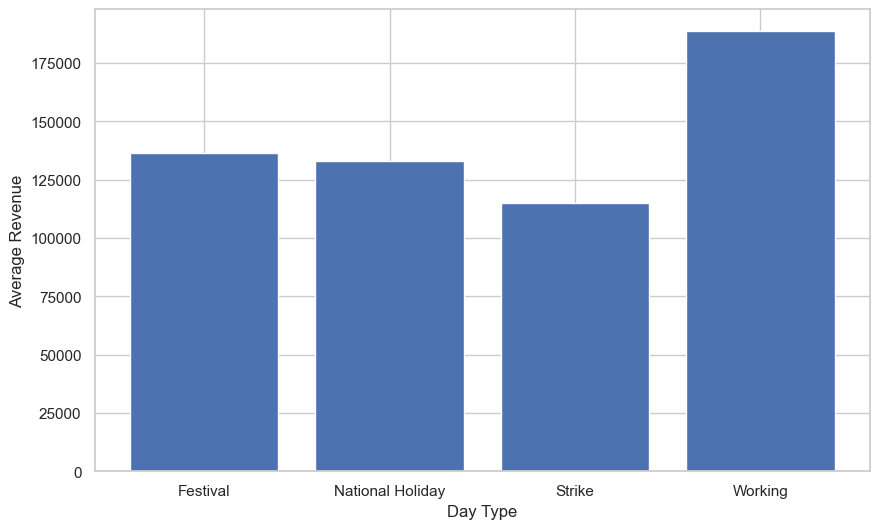

In [32]:
day_revenue = train_df.groupby('Day_Type').mean()['revenue'].reset_index()

plt.bar(day_revenue['Day_Type'], day_revenue['revenue'])
plt.ylabel('Average Revenue')
plt.xlabel('Day Type')

<AxesSubplot:xlabel='ATM_Placement', ylabel='revenue'>

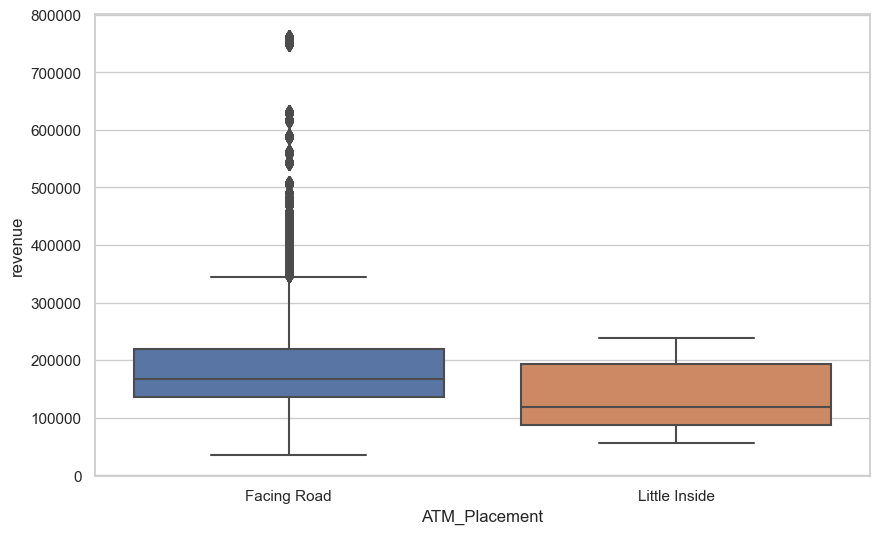

In [8]:
sns.set_style("whitegrid")

sns.boxplot(x="ATM_Placement", y="revenue", data=train_df)

Text(0.5, 0, 'Day Type')

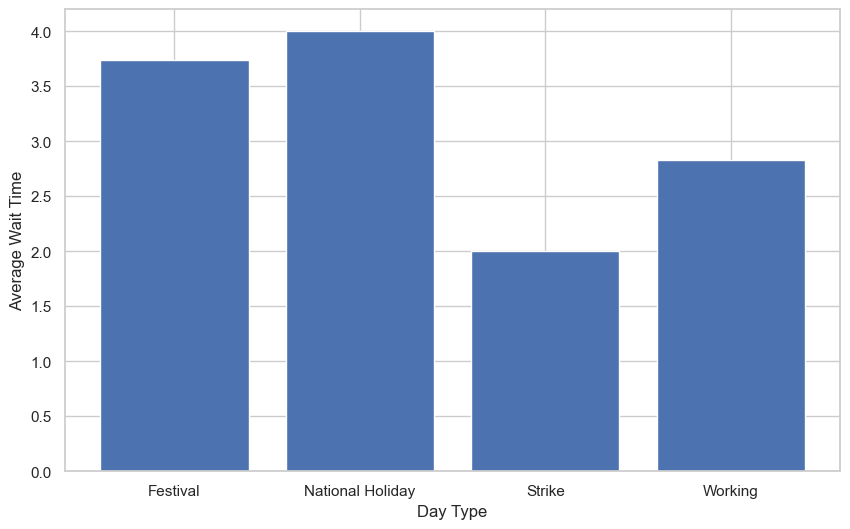

In [30]:
wait_time = train_df.groupby('Day_Type').mean()['Average_Wait_Time'].reset_index()

plt.bar(wait_time['Day_Type'], wait_time['Average_Wait_Time'])
plt.ylabel('Average Wait Time')
plt.xlabel('Day Type')

Text(0.5, 0, 'ATM Type')

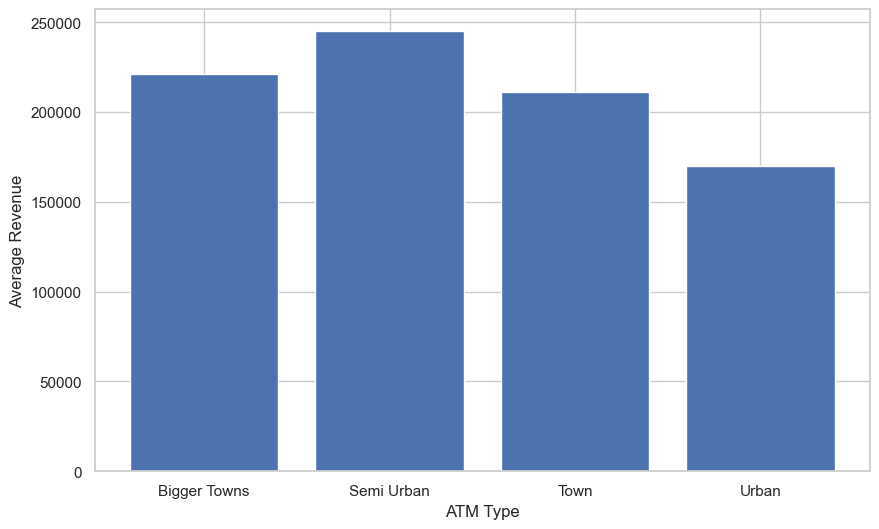

In [28]:
atm_revenue = train_df.groupby('ATM_TYPE').mean()['revenue'].reset_index()

plt.bar(atm_revenue['ATM_TYPE'], atm_revenue['revenue'])
plt.ylabel('Average Revenue')
plt.xlabel('ATM Type')

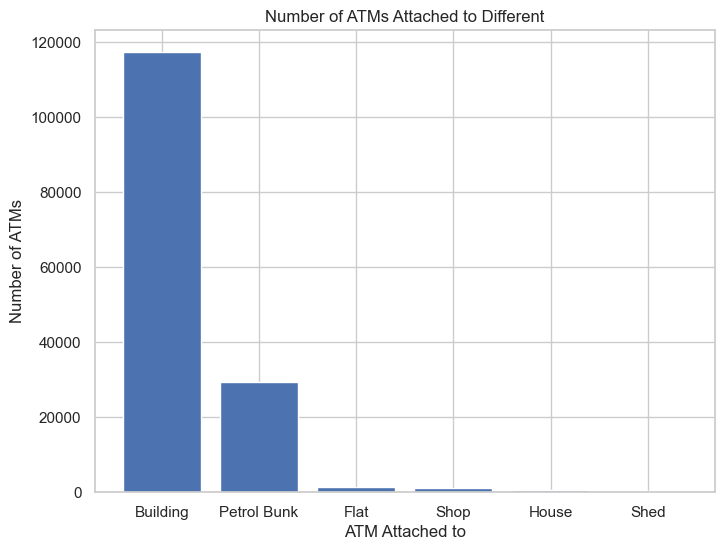

In [15]:

atm_zone_count = train_df['ATM_Attached_to'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(atm_zone_count.index, atm_zone_count.values)
plt.xlabel('ATM Attached to')
plt.ylabel('Number of ATMs')
plt.title('Number of ATMs Attached to Different')
plt.show()

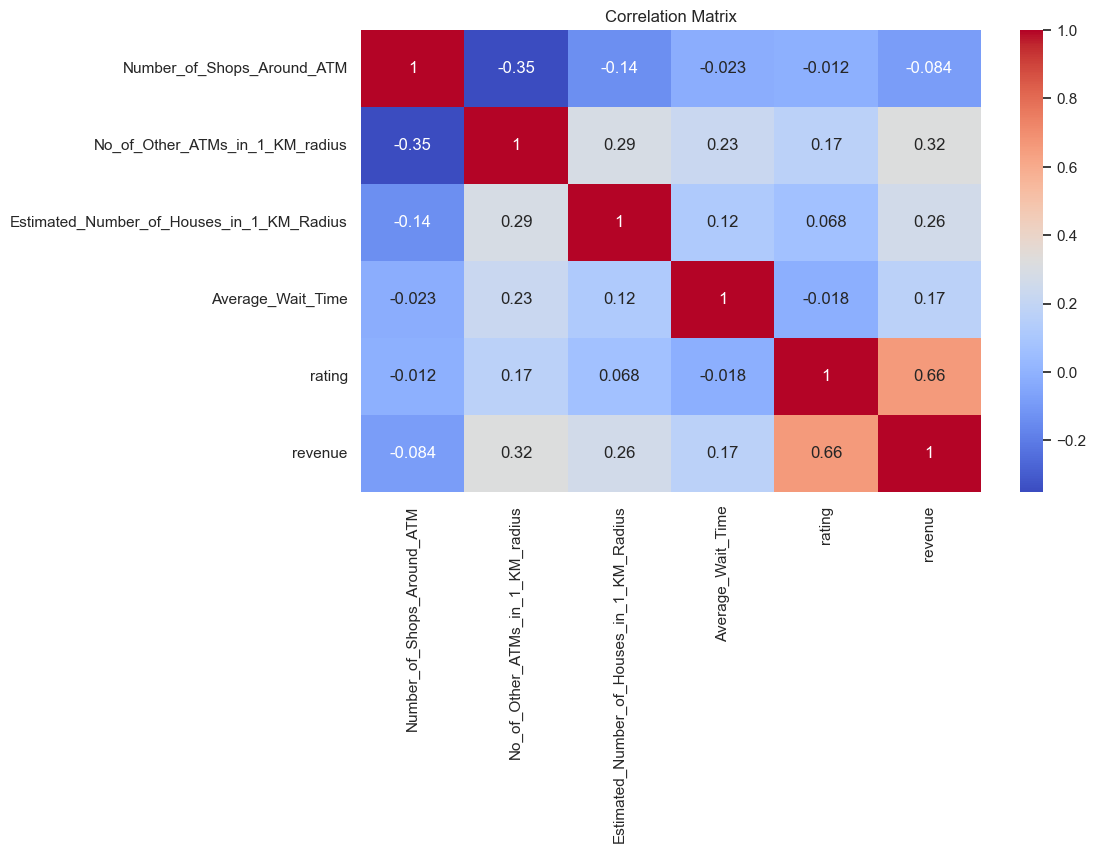

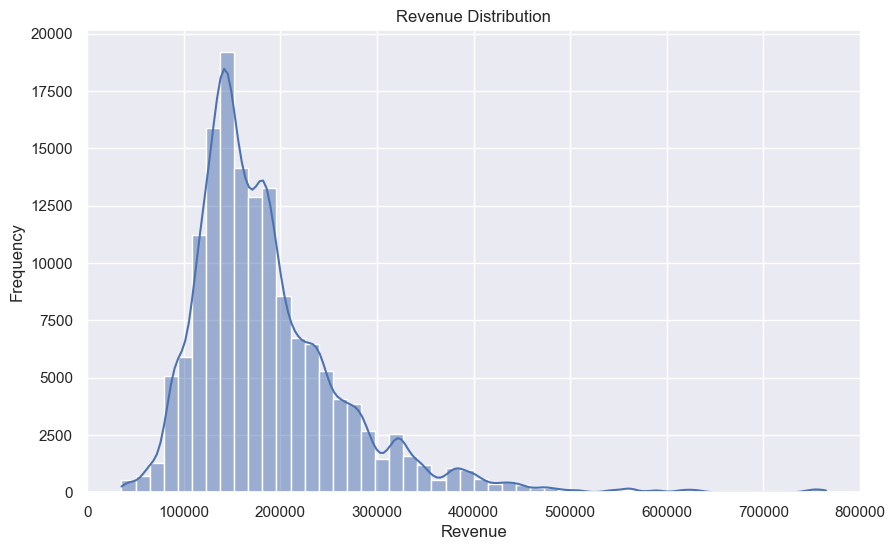

In [5]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.histplot(train_df['revenue'], bins=50, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

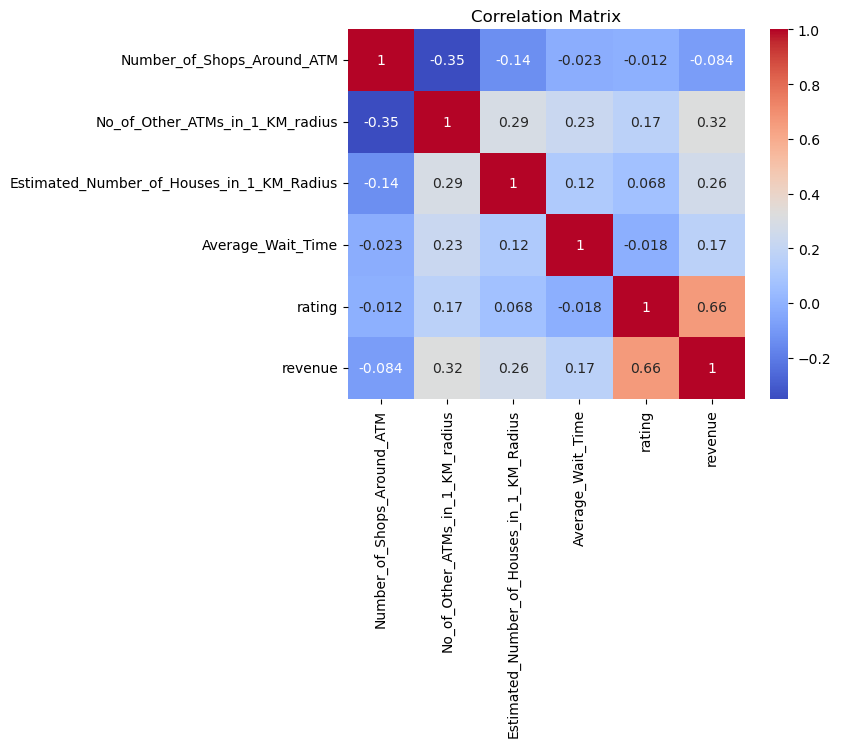

In [2]:
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [2]:
import time
import csv
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

train_df1 = pd.read_csv('train.tsv', delimiter='\t')
test_df1 = pd.read_csv('test.tsv', delimiter='\t')

# corr_matrix = train_data.corr()
# print(corr_matrix['revenue'].sort_values(ascending=False))

train_df=pd.get_dummies(train_df1, columns=["ATM_Zone","ATM_Placement","ATM_TYPE","ATM_Location_TYPE","ATM_looks","ATM_Attached_to","Day_Type"])
test_df=pd.get_dummies(train_df1, columns=["ATM_Zone","ATM_Placement","ATM_TYPE","ATM_Location_TYPE","ATM_looks","ATM_Attached_to","Day_Type"])

train_df = train_df.fillna(train_df.mean())
test_df = test_df.fillna(test_df.mean())

# Part1 Regression ###########################################################################################
# "ATM_Zone","ATM_Location_TYPE", "ATM_looks", "ATM_Attached_to", "ATM_Placement", "ATM_TYPE","revenue"
val_x = train_df.drop(["revenue"], axis=1)
val_y = train_df["revenue"]
test_x = test_df.drop(["revenue"], axis=1)
test_y = test_df["revenue"]

scaler = StandardScaler()

# X_train = scaler.fit(val_x)
X_train = scaler.fit_transform(val_x)

start=time.time()
model = GradientBoostingRegressor(n_estimators = 240, learning_rate = 0.4, max_depth = 8)
model.fit(X_train, val_y)
end=time.time()
timeq=end-start
print(end)

# X_test = test_df.drop("revenue", axis=1)
# X_test = scaler.transform(X_test)
X_test = scaler.transform(test_x)
Y_test = model.predict(X_test)
# print(Y_test)
# corr_coef = pd.Series(Y_test).corr(pd.Series(test_df['revenue']))
# print(corr_coef)

res = stats.pearsonr(Y_test, test_y)
print(res)

Y_test=Y_test.astype(int)
with open('z5378269.PART1.output.csv', 'w') as file:
    file.write('predicted_revenue\n')
    for val in Y_test:
        file.write(f'{val}\n')
    

# Part 2 Classification ######################################################################################

val_x1 = train_df.drop(["rating"], axis=1)
val_y1 = train_df["rating"]
test_x1 = test_df.drop(["rating"], axis=1)
test_y = test_df["rating"]

scaler = StandardScaler()

X_train1 = scaler.fit_transform(val_x1)

start=time.time()
model = GradientBoostingClassifier(n_estimators = 240, learning_rate = 0.4, max_depth = 8)
model.fit(X_train1, val_y1)
end=time.time()
timeq=end-start
print(end)

X_test1 = scaler.transform(test_x1)
Y_test1 = model.predict(X_test1)


Y_test1=Y_test1.astype(int)

acc = accuracy_score(test_y, Y_test1)
print(acc)

with open('z5378269.PART2.output.csv', 'w') as file:
    file.write('predicted_revenue\n')
    for val in Y_test1:
        file.write(f'{val}\n')

1681998164.7765412
PearsonRResult(statistic=0.9982050434687159, pvalue=0.0)
1681999513.3974614
0.9999800280938147
